In [27]:
%store -r df
%store -r custom_palette
%store -r rslt

import pandas as pd
import numpy as np
import seaborn as sns
import researchpy as rp
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%run -i functions.ipynb

In [28]:
df

,sex,lang,country,age,hours_studied,class,test_prep,pass,notes,goals/hopes/concerns,class2
0,Male,Korean,Korea,20,10.578594,Only class,False,True,NaN,pass the test,Did not take a course
1,Male,Korean,Korea,22,7.814520,None,False,True,NaN,,Did not take a course
2,Male,Korean,Korea,27,4.213682,None,False,True,NaN,"*goal: improve programming skill, *concern: no...",Did not take a course
3,Male,Korean,Korea,24,0.000000,None,False,True,NaN,,Did not take a course
4,Female,Korean,Korea,21,3.248907,None,False,False,NaN,,Did not take a course
...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,Korean,Korea,29,3.291721,None,False,True,NaN,,Did not take a course
4996,Female,Korean,Korea,22,1.590491,None,False,False,NaN,,Did not take a course
4997,Male,English,UK,25,5.029988,None,False,False,NaN,learn business Korean,Did not take a course
4998,Male,Korean,Korea,22,1.730570,Only class,False,True,NaN,,Did not take a course


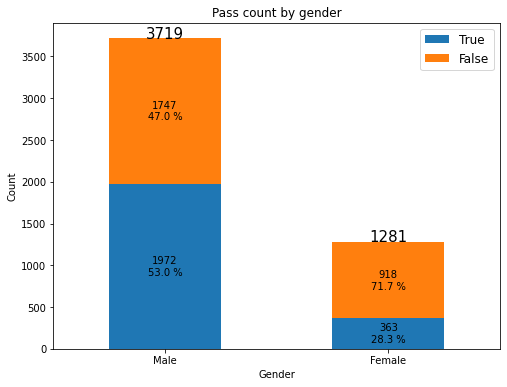

In [29]:
## by gender
total = totalby(df, 'sex', 'pass')
var2auto(total, 'Pass count by gender', 'Gender', 'Count')

In [30]:
# chi square test - gender
crosstab, test_results, expected = rp.crosstab(df['sex'], df['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
test_results

# Chi-square test	results
# 0	Pearson Chi-square ( 1.0) =	233.3055
# 1	p-value =	0.0000
# 2	Cramer's phi =	0.2160

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,233.3055
1,p-value =,0.0000
2,Cramer's phi =,0.2160


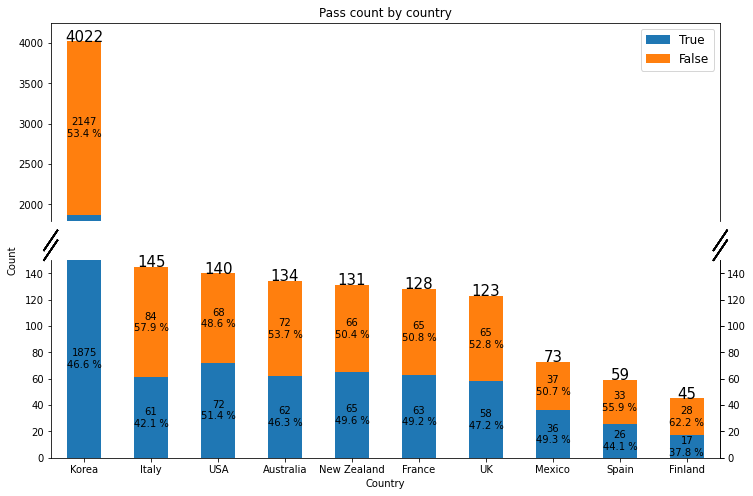

In [31]:
## By country
tot_country = totalby(df, 'country', 'pass')

var2break(tot_country, 'Pass count by country', 
          'Country', 'Count', 
          ylimtop = [1800,4250], ylimbot = [0,150])

In [32]:
## chi square test - country
crosstab, test_results, expected = rp.crosstab(df['country'], df['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
test_results
# 	Chi-square test	results
# 0	Pearson Chi-square ( 9.0) =	5.1163
# 1	p-value =	0.8241
# 2	Cramer's V =	0.0320

# Without Korea
df1 = df[df['country']!='Korea']
crosstab, test_results, expected = rp.crosstab(df1['country'], df1['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
test_results
# 	Chi-square test	results
# 0	Pearson Chi-square ( 8.0) =	5.0573
# 1	p-value =	0.7514
# 2	Cramer's V =	0.0719

,Chi-square test,results
0,Pearson Chi-square ( 8.0) =,5.0573
1,p-value =,0.7514
2,Cramer's V =,0.0719


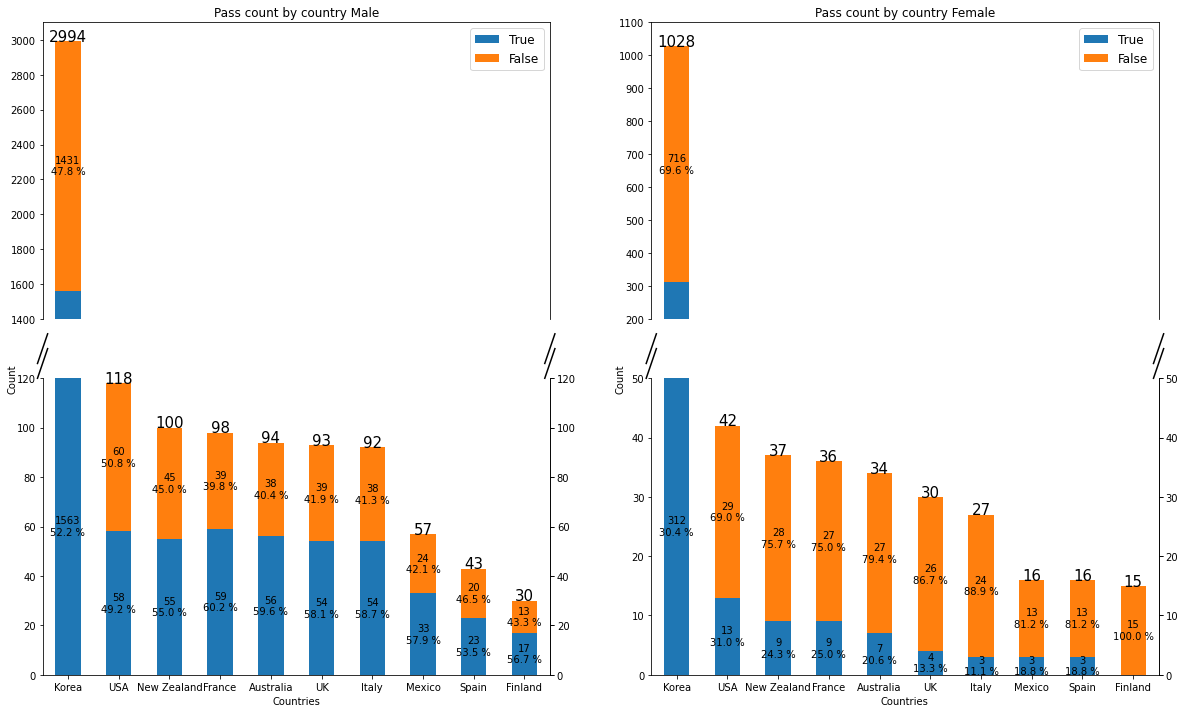

In [33]:
## test pass count by gender/country
var2break2(df, 'Pass count by country', 'country', 'pass', 'sex', 'sex','Male', 'Female',
           'Countries', 'Count', [1400,3100], [0,120], [200,1100], [0,50])

In [34]:
## chi square test - country
df1 = df[df['sex']=='Male']
crosstab, test_results, expected = rp.crosstab(df1['country'], df1['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('Male by country')
print(test_results)
# Chi-square test	results
# 0	Pearson Chi-square ( 9.0) =	8.1650
# 1	p-value =	0.5176
# 2	Cramer's V =	0.0469

# Without Korea
df1 = df[(df['sex']=='Male')&(df['country']!='Korea')]
crosstab, test_results, expected = rp.crosstab(df1['country'], df1['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('Male w/o Korea by country')
print(test_results)
# Chi-square test	results
# 0	Pearson Chi-square ( 8.0) =	4.0652
# 1	p-value =	0.8512
# 2	Cramer's V =	0.0749


df2 = df[df['sex']=='Female']
crosstab, test_results, expected = rp.crosstab(df2['country'], df2['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('Female by country')
print(test_results)
#                 Chi-square test  results
# 0  Pearson Chi-square ( 9.0) =   18.3397
# 1                    p-value =    0.0314
# 2                 Cramer's V =    0.1197

df2 = df[(df['sex']=='Female')&(df['country']!='Korea')]
crosstab, test_results, expected = rp.crosstab(df2['country'], df2['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('Female w/o Korea by country')
print(test_results)
#                Chi-square test  results
# 0  Pearson Chi-square ( 8.0) =   10.0357
# 1                    p-value =    0.2625
# 2                 Cramer's V =    0.1992

Male by country
                Chi-square test  results
0  Pearson Chi-square ( 9.0) =    8.1650
1                    p-value =    0.5176
2                 Cramer's V =    0.0469
Male w/o Korea by country
                Chi-square test  results
0  Pearson Chi-square ( 8.0) =    4.0652
1                    p-value =    0.8512
2                 Cramer's V =    0.0749
Female by country
                Chi-square test  results
0  Pearson Chi-square ( 9.0) =   18.3397
1                    p-value =    0.0314
2                 Cramer's V =    0.1197
Female w/o Korea by country
                Chi-square test  results
0  Pearson Chi-square ( 8.0) =   10.0357
1                    p-value =    0.2625
2                 Cramer's V =    0.1992


In [35]:
# mapping by continent
cont_dict = {"Korea" : 'Korea', "Italy" : 'Europe', "France": 'Europe', "UK" : 'Europe', "Spain": 'Europe', 
             "Finland": 'Europe', "USA": 'America', "Mexico": 'America', 
             "Australia": 'Oceania', "New Zealand": "Oceania"}
df['continent'] = df['country']
df.replace({"continent": cont_dict}, inplace=True)

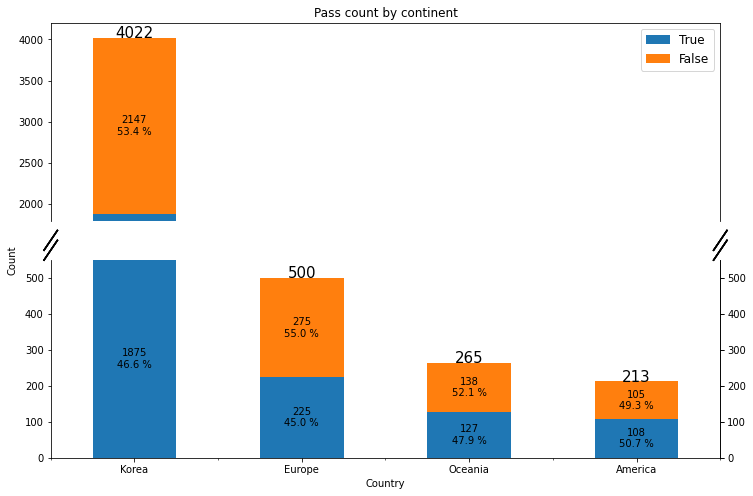

In [36]:
## By continent
tot_continent = totalby(df, 'continent', 'pass')

var2break(tot_continent, 'Pass count by continent', 
          'Country', 'Count', 
          ylimtop = [1800,4200], ylimbot = [0,550])

In [37]:
crosstab, test_results, expected = rp.crosstab(df['continent'], df['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By continent')
print(test_results)
#  Chi-square test  results
# 0  Pearson Chi-square ( 3.0) =    2.1229
# 1                    p-value =    0.5473
# 2                 Cramer's V =    0.0206

df1 = df[df['country']!='Korea']
crosstab, test_results, expected = rp.crosstab(df1['continent'], df1['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By continent excl. Korea')
print(test_results)
#  Chi-square test  results
# 0  Pearson Chi-square ( 3.0) =    2.1229
# 1                    p-value =    0.5473
# 2                 Cramer's V =    0.0206

By continent
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =    2.1229
1                    p-value =    0.5473
2                 Cramer's V =    0.0206
By continent excl. Korea
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    2.0665
1                    p-value =    0.3559
2                 Cramer's V =    0.0460


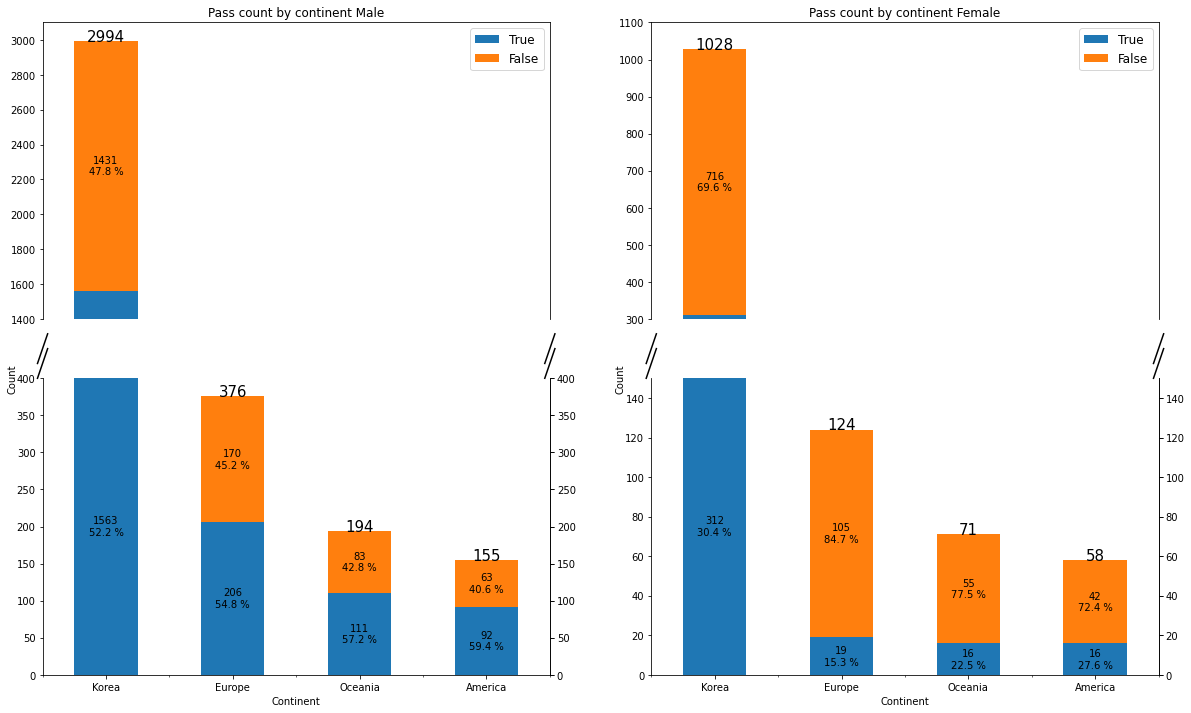

In [38]:
## test pass count by gender/country
var2break2(df, 'Pass count by continent', 'continent', 'pass', 'sex', 'sex', 'Male', 'Female',
           'Continent', 'Count', [1400,3100], [0,400], [300,1100], [0,150])


In [39]:
df1 = df[df['sex']=='Male']
crosstab, test_results, expected = rp.crosstab(df1['continent'], df1['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By continent only Male')
print(test_results)
# 	Chi-square test	results
# 0	Pearson Chi-square ( 3.0) =	5.1398
# 1	p-value =	0.1618
# 2	Cramer's V =	0.0372

df1 = df[(df['sex']=='Male')&(df['country']!='Korea')]
crosstab, test_results, expected = rp.crosstab(df1['continent'], df1['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By continent only Male except Korea')
print(test_results)
# Chi-square test	results
# 0	Pearson Chi-square ( 2.0) =	1.0007
# 1	p-value =	0.6063
# 2	Cramer's V =	0.0372

df2 = df[df['sex']=='Female']
crosstab, test_results, expected = rp.crosstab(df2['continent'], df2['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By continent only Female')
print(test_results)
# Chi-square test	results
# 0	Pearson Chi-square ( 3.0) =	13.5870
# 1	p-value =	0.0035
# 2	Cramer's V =	0.1030

df2 = df[(df['sex']=='Female')&(df['country']!='Korea')]
crosstab, test_results, expected = rp.crosstab(df2['continent'], df2['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By continent only Female except Korea')
print(test_results)
# Chi-square test	results
# 0	Pearson Chi-square ( 2.0) =	4.0391
# 1	p-value =	0.1327
# 2	Cramer's V =	0.1264

By continent only Male
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =    5.1398
1                    p-value =    0.1618
2                 Cramer's V =    0.0372
By continent only Male except Korea
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    1.0007
1                    p-value =    0.6063
2                 Cramer's V =    0.0372
By continent only Female
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   13.5870
1                    p-value =    0.0035
2                 Cramer's V =    0.1030
By continent only Female except Korea
                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    4.0391
1                    p-value =    0.1327
2                 Cramer's V =    0.1264


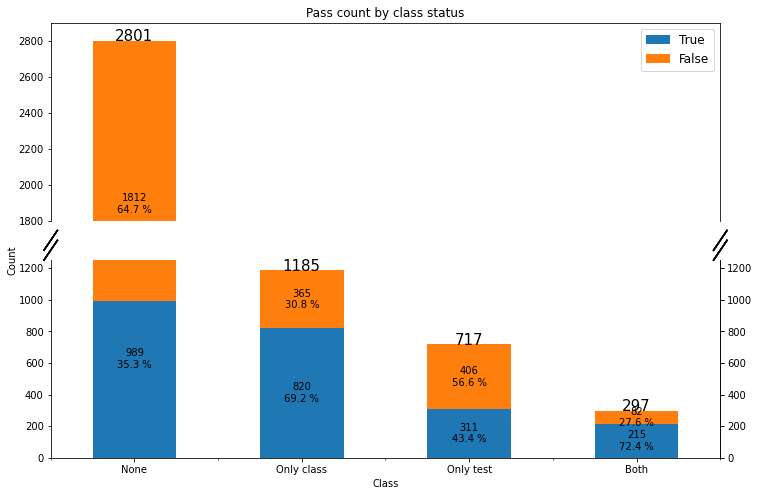

In [40]:
## By course status
tot_class = totalby(df, 'class', 'pass')

var2break(tot_class, 'Pass count by class status', 
          'Class', 'Count', 
          ylimtop = [1800,2900], ylimbot = [0,1250])

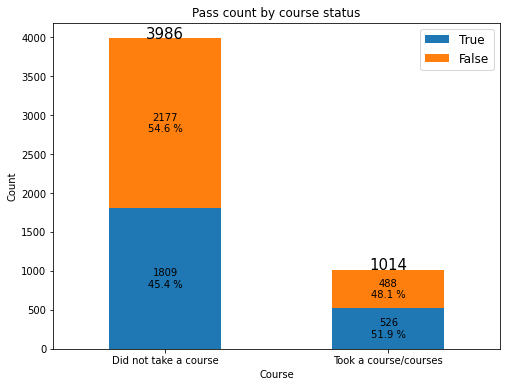

In [41]:
## by course status

total_class2 = totalby(df, 'class2', 'pass')
var2auto(total_class2, 'Pass count by course status', 'Course', 'Count')

In [42]:
crosstab, test_results, expected = rp.crosstab(df['class2'], df['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By course')
print(test_results)
#                 Chi-square test   results
# 0  Pearson Chi-square ( 1.0) =   332.0101
# 1                    p-value =     0.0000
# 2               Cramer's phi =     0.2577

By course
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   13.6786
1                    p-value =    0.0002
2               Cramer's phi =    0.0523


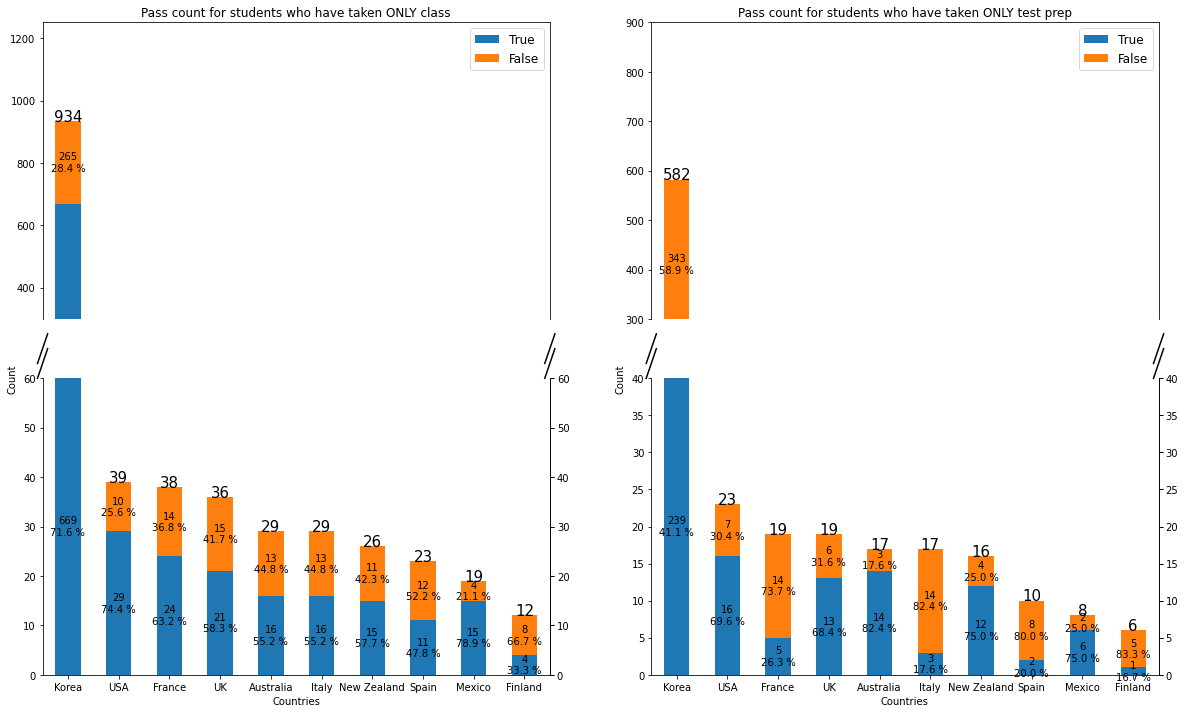

In [43]:
var2break2(df, 'Pass count for students who have taken ONLY', 'country', 
           'pass', 'class', 'class', "Only class", "Only test",
           'Countries', 'Count', [300,1250], [0,60], [300,900], [0,40])

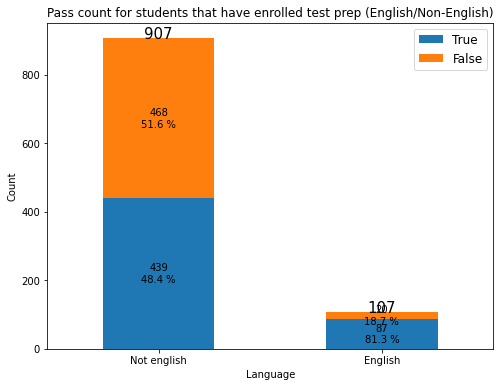

In [44]:
# combine class and test prep variable for eda purposes
df['english'] = np.where(df['lang'] == 'English', 'English', 'Not english')

## by test_prep

total_english = totalby(df[df['test_prep']==True], 'english', 'pass')
var2auto(total_english, 'Pass count for students that have enrolled test prep (English/Non-English)', 'Language', 'Count')

In [45]:
df2 = df[df['test_prep']==True]
crosstab, test_results, expected = rp.crosstab(df2['english'], df2['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By english language for test prep')
print(test_results)
#                 Chi-square test  results
# 0  Pearson Chi-square ( 1.0) =   41.5147
# 1                    p-value =    0.0000
# 2               Cramer's phi =    0.2023

By english language for test prep
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   41.5147
1                    p-value =    0.0000
2               Cramer's phi =    0.2023


In [46]:
df['age'].min()

18

Max is 24.25931389
Min is 0.0
Mean is 3.320813104199572
STD is 3.7845945688952574
Max is 17.96744903
Min is 0.0
Mean is 2.7120012148585366
STD is 3.154973602530983
Max is 24.25931389
Min is 0.0
Mean is 3.3000529270532453
STD is 3.764378155433261
Max is 23.1809657
Min is 0.0
Mean is 3.433592909523416
STD is 3.890651288255505
Max is 15.40473299
Min is 0.0
Mean is 2.650425437188895
STD is 3.0934475854617074
Max is 17.96744903
Min is 0.0
Mean is 2.8291830052603486
STD is 3.2656577862002636
Max is 24.25931389
Min is 0.0
Mean is 3.320813104199572
STD is 3.7845945688952574
Max is 17.96744903
Min is 0.0
Mean is 2.7120012148585366
STD is 3.154973602530983
Max is nan
Min is nan
Mean is nan
STD is nan
Max is 18.16820568
Min is 0.0
Mean is 3.3978116549809885
STD is 3.8003728504467236
Max is nan
Min is nan
Mean is nan
STD is nan
Max is 15.40473299
Min is 0.0
Mean is 2.3288236111680325
STD is 2.914688553451709


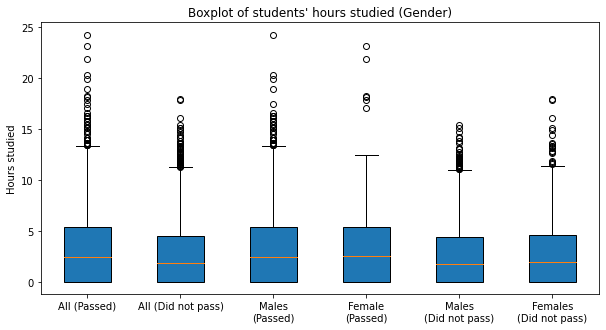

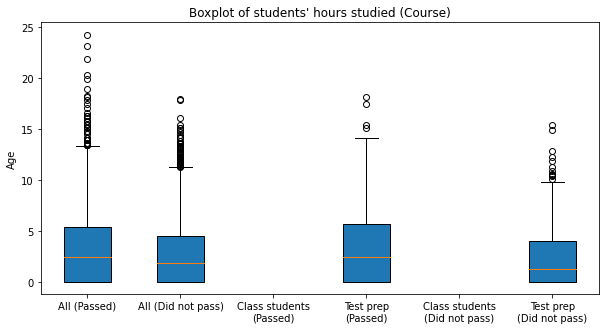

In [47]:
gender_box = [df[df['pass']==True]['hours_studied'],
              df[df['pass']==False]['hours_studied'],
              df[(df['sex']=='Male')&(df['pass']==True)]['hours_studied'],
              df[(df['sex']=='Female')&(df['pass']==True)]['hours_studied'],
              df[(df['sex']=='Male')&(df['pass']==False)]['hours_studied'],
              df[(df['sex']=='Female')&(df['pass']==False)]['hours_studied']]
for i in gender_box:
    print('Max is ' + str(np.max(i)))
    print('Min is ' + str(np.min(i)))
    print('Mean is ' + str(np.mean(i)))
    print('STD is ' + str(np.std(i)))

course_box = [df[df['pass']==True]['hours_studied'],
              df[df['pass']==False]['hours_studied'],
              df[(df['class']==True)&(df['pass']==True)]['hours_studied'],
              df[(df['test_prep']==True)&(df['pass']==True)]['hours_studied'],
              df[(df['class']==True)&(df['pass']==False)]['hours_studied'],
              df[(df['test_prep']==True)&(df['pass']==False)]['hours_studied']]
for i in course_box:
    print('Max is ' + str(np.max(i)))
    print('Min is ' + str(np.min(i)))
    print('Mean is ' + str(np.mean(i)))
    print('STD is ' + str(np.std(i)))


fig, ax = plt.subplots(figsize=(10,5))
plt.boxplot(gender_box, vert=True, patch_artist=True, 
            labels= ['All (Passed)', 'All (Did not pass)', 
                     'Males\n(Passed)', 'Female\n(Passed)',
                     'Males\n(Did not pass)', 'Females\n(Did not pass)']) 
plt.ylabel('Hours studied')
plt.title("Boxplot of students' hours studied (Gender)")
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
plt.boxplot(course_box, vert=True, patch_artist=True, 
            labels= ['All (Passed)', 'All (Did not pass)', 
                     'Class students\n(Passed)', 'Test prep\n(Passed)',
                     'Class students\n(Did not pass)', 'Test prep\n(Did not pass)']) 
plt.ylabel('Age')
plt.title("Boxplot of students' hours studied (Course)")
plt.show()


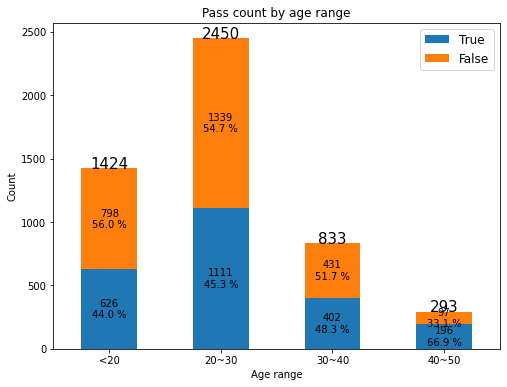

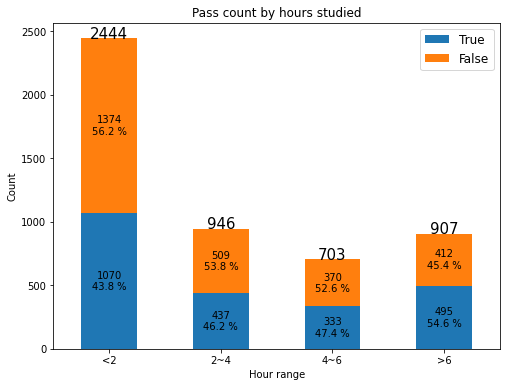

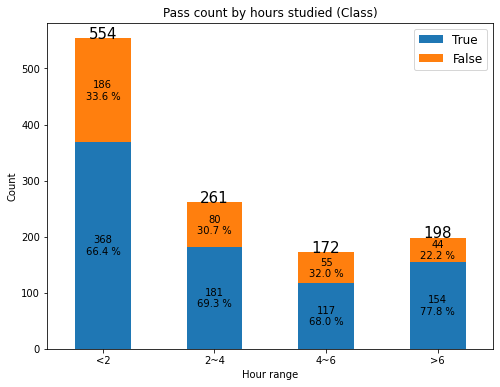

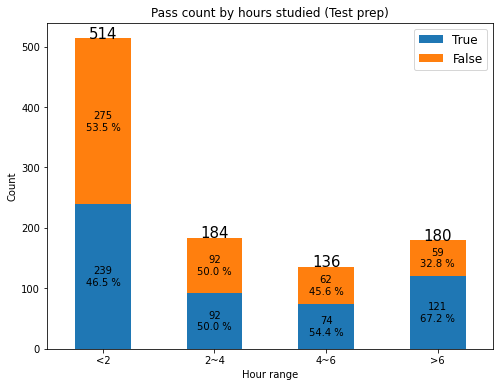

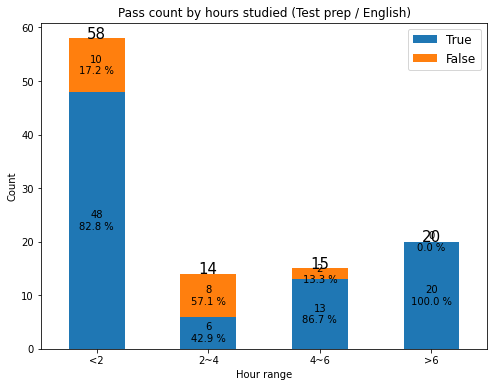

In [48]:
df['age_bin'] = pd.cut(df['age'], [0, 20, 30, 40, 50],
                       labels = ['<20', '20~30', '30~40', '40~50'])
df['hour_bin'] = pd.cut(df['hours_studied'], [-1, 2, 4, 6, 500],
                       labels = ['<2', '2~4', '4~6', '>6'])
# plt.boxplot(course_box, vert=True, patch_artist=True, 
#             labels= ['All', 'Class', 'Test prep']) 
# plt.ylabel('Age')
# plt.title("Boxplot of ")
# plt.show()

## by agebin
total_age = totalby(df, 'age_bin', 'pass')
total_age = total_age.reindex(["<20", "20~30",  "30~40", "40~50"])
var2auto(total_age, 'Pass count by age range', 'Age range', 'Count')

total_hr = totalby(df, 'hour_bin', 'pass')
total_hr = total_hr.reindex(['<2', '2~4', '4~6', '>6'])
var2auto(total_hr, 'Pass count by hours studied', 'Hour range', 'Count')

total_hr_dj = totalby(df[df['class']=='Only class'], 'hour_bin', 'pass')
total_hr_dj = total_hr_dj.reindex(['<2', '2~4', '4~6', '>6'])
var2auto(total_hr_dj, 'Pass count by hours studied (Class)', 'Hour range', 'Count')

total_hr_tp = totalby(df[df['test_prep']==True], 'hour_bin', 'pass')
total_hr_tp = total_hr_tp.reindex(['<2', '2~4', '4~6', '>6'])
var2auto(total_hr_tp, 'Pass count by hours studied (Test prep)', 'Hour range', 'Count')

total_hr_tp_eng = totalby(df[(df['test_prep']==True)&(df['english']=='English')], 'hour_bin', 'pass')
total_hr_tp_eng = total_hr_tp_eng.reindex(['<2', '2~4', '4~6', '>6'])
var2auto(total_hr_tp_eng, 'Pass count by hours studied (Test prep / English)', 'Hour range', 'Count')

In [49]:

crosstab, test_results, expected = rp.crosstab(df['age_bin'], df['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By age')
print(test_results)

crosstab, test_results, expected = rp.crosstab(df['hour_bin'], df['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By hours')
print(test_results)

df2 = df[df['test_prep']==True]
crosstab, test_results, expected = rp.crosstab(df2['hour_bin'], df2['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By hours for test prep')
print(test_results)

df2 = df[df['class']=='Only class']
crosstab, test_results, expected = rp.crosstab(df2['hour_bin'], df2['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By hours for class')
print(test_results)

df2 = df[(df['test_prep']==True)&(df['english']=='English')]
crosstab, test_results, expected = rp.crosstab(df2['hour_bin'], df2['pass'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
print('By hours for tp english')
print(test_results)

By age
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   54.9126
1                    p-value =    0.0000
2                 Cramer's V =    0.1048
By hours
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   31.1919
1                    p-value =    0.0000
2                 Cramer's V =    0.0790
By hours for test prep
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   23.5448
1                    p-value =    0.0000
2                 Cramer's V =    0.1524
By hours for class
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =    8.9497
1                    p-value =    0.0300
2                 Cramer's V =    0.0869
By hours for tp english
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   18.5810
1                    p-value =    0.0003
2                 Cramer's V =    0.4167


In [50]:
# notes that have javascript
df['notes'] = df['notes'].replace(np.nan, '')
df['notes_js'] = np.where(df['notes'].str.contains('javascript', case = False),
                          1,0)

# goals that have english or learn
df['goals_english'] = np.where(df['goals/hopes/concerns'].str.contains('english', case = False),
                                    1,0)
df['goals_learn'] = np.where(df['goals/hopes/concerns'].str.contains('learn', case = False),
                                  1,0)

In [51]:
print(str(sum(df[df['notes_js']==1]['pass'])) + ' out of ' + str(len(df[df['notes_js']==1]['pass'])))
print(str(sum(df[(df['goals_english']==1)|(df['goals_learn']==1)]['pass'])) + ' out of ' + str(len(df[(df['goals_english']==1)|(df['goals_learn']==1)])))

137 out of 295
15 out of 30


In [52]:
%store df
%store custom_palette
%store rslt

Stored 'df' (DataFrame)
Stored 'custom_palette' (list)
Stored 'rslt' (DataFrame)
